## author: Keer Mei
- github: kmei92
- email: keer.mei18@imperial.ac.uk

# Setup

In [1]:
# importing the necessary modules
import sys
sys.path.append("..")
from PDESystem import *
from PDESubsystem import *
from pdeforms import *

%load_ext autoreload
%autoreload 2

In [2]:
# a PDESystem child class called PDESolver. Note, the setup_constants function and setup_bcs are declared
# and overloaded here and the PDESystem's functions are not used. This is designed for clarity
class pde_solver(PDESystem):
    def __init__(self, comp, mesh, parameters):
        PDESystem.__init__(self, comp, mesh, parameters)

    def setup_bcs(self):
        x, y = fd.SpatialCoordinate(self.mesh)
        
        bcu = [fd.DirichletBC(self.V['u'], fd.Constant((0,0)), (10, 12)), # top-bottom
          fd.DirichletBC(self.V['u'], ((1.0*(y - 1)*(2 - y))/(0.5**2) ,0), 9)] # inflow
        bcp = [fd.DirichletBC(self.V['p'], fd.Constant(0), 11)]  # outflow


        self.bc['u'][0] = [bcu, None, None, None,'fixed']
        self.bc['p'] = [[bcp, None, None, None, 'fixed']]

    def setup_constants(self):
        x, y = fd.SpatialCoordinate(self.mesh)
        self.constants = {
            'deltat' : fd.Constant(self.prm['dt']),
            'Kd' : fd.Constant(0.01),
            'k1' : fd.Constant(0.005),
            'k2' : fd.Constant(0.00005),
            'lamd1' : fd.Constant(0.000005),
            'lamd2' : fd.Constant(0.0),
            'rho_s' : fd.Constant(1.),
            'L' :  fd.Constant(1.),
            'phi' : fd.Constant(0.3),
            'n' : fd.FacetNormal(self.mesh),
            'f' : fd.Constant((0.0, 0.0)),
            'nu' : fd.Constant(0.001),
            'frac' : fd.Constant(1.),
            'source1' : fd.conditional(pow(x-1, 2)+pow(y-1.5,2)<0.25*0.25, 10.0, 0)
        }
        

# Solve

In [3]:
# update the parameters
solver_parameters = recursive_update(solver_parameters,
{'space': {'u': fd.VectorFunctionSpace, 'c': fd.MixedFunctionSpace, 'd' : fd.MixedFunctionSpace},
'degree': {'u': 2},
'order' : {'c': 3, 'd':3},
'ksp_type': {'u': 'gmres', 'p': 'gmres',  'c': 'gmres', 'd':'gmres'},
'precond': {'u': 'sor', 'p' : 'sor', 'c': 'sor', 'd':'gmres'},
'dt' : 0.05,
'T' : 50})

#load mesh
mesh = fd.Mesh("../../meshes/step_long.msh")

# add subsystems for navier stokes and radio_transport
solver = pde_solver([['u', 'p']], mesh, solver_parameters)
solver.add_subsystem(['c', 'd'], solver_parameters)

#setup constants
solver.setup_constants()

# define subsystems and variable sequence
solver.define(['u', 'p', 'u'], 'up', navier_stokes)
solver.define(['c', 'd'], 'cd', radio_transport_coupled)

# setup boundary conditions
solver.setup_bcs()

#solve
solver.solve()

time = 1.000
time = 2.000
time = 3.000
time = 4.000
time = 5.000
time = 6.000
time = 7.000
time = 8.000
time = 9.000
time = 10.000
time = 11.000
time = 12.000
time = 13.000
time = 14.000
time = 15.000
time = 16.000
time = 17.000
time = 18.000
time = 19.000
time = 20.000
time = 21.000
time = 22.000
time = 23.000
time = 24.000
time = 25.000
time = 26.000
time = 27.000
time = 28.000
time = 29.000
time = 30.000
time = 31.000
time = 32.000
time = 33.000
time = 34.000
time = 35.000
time = 36.000
time = 37.000
time = 38.000
time = 39.000
time = 40.000
time = 41.000
time = 42.000
time = 43.000
time = 44.000
time = 45.000
time = 46.000
time = 47.000
time = 48.000
time = 49.000
time = 50.000


# Plotting

## Pressure and Velocity

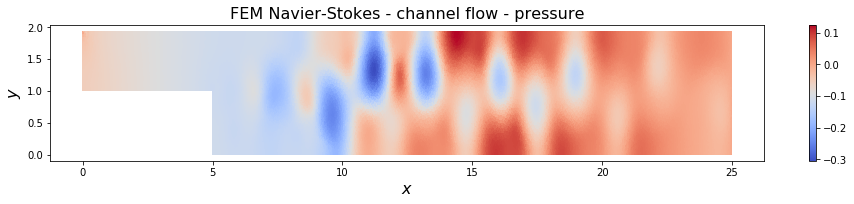

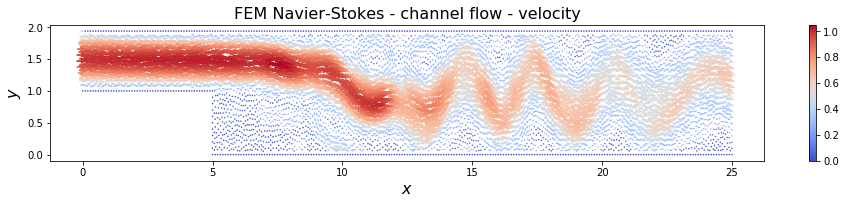

In [5]:
fig1 = plt.figure(figsize=(16, 2.5))
ax1 = fig1.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('FEM Navier-Stokes - channel flow - pressure', fontsize=16)
fd.plot(solver.form_args['p_'],axes=ax1)
# ax1.axis('equal')

fig2 = plt.figure(figsize=(16, 2.5))
ax2 = fig2.add_subplot(111)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
ax2.set_title('FEM Navier-Stokes - channel flow - velocity', fontsize=16)
fd.plot(solver.form_args['u_'],axes=ax2)
# ax2.axis('equal')

## 1st Radionuclide Profile

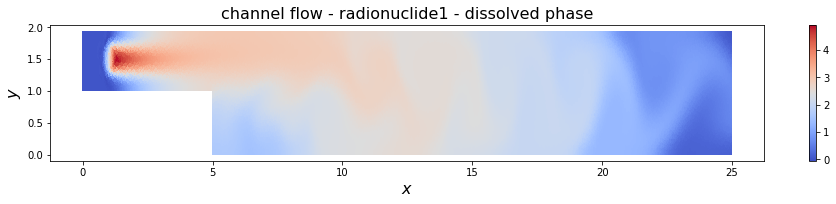

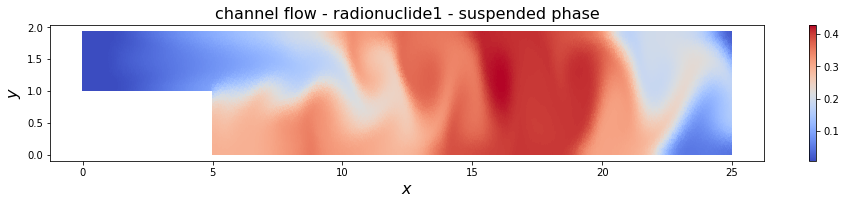

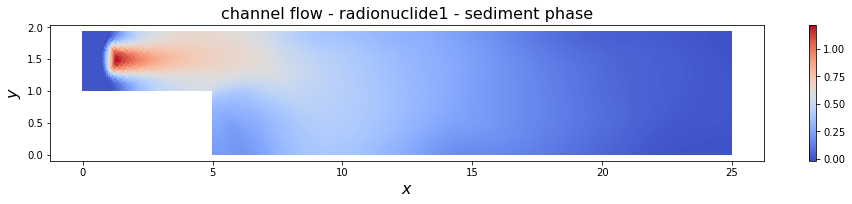

In [6]:
# since each phase contains two species and is a MixedFunctionSpace, use firedrake's split function
# to retrieve each subcomponent
cd, cs, csed = solver.form_args['c_'].split()
dd, ds, dsed = solver.form_args['d_'].split()
fig3 = plt.figure(figsize=(16, 2.5))
ax3 = fig3.add_subplot(111)
ax3.set_xlabel('$x$', fontsize=16)
ax3.set_ylabel('$y$', fontsize=16)
ax3.set_title('channel flow - radionuclide1 - dissolved phase', fontsize=16)
fd.plot(cd,axes=ax3)
# fig3.colorbar()
# ax3.axis('equal')

fig4 = plt.figure(figsize=(16, 2.5))
ax4 = fig4.add_subplot(111)
ax4.set_xlabel('$x$', fontsize=16)
ax4.set_ylabel('$y$', fontsize=16)
ax4.set_title('channel flow - radionuclide1 - suspended phase', fontsize=16)
fd.plot(cs, axes=ax4)
# ax4.axis('equal')

fig5 = plt.figure(figsize=(16, 2.5))
ax5 = fig5.add_subplot(111)
ax5.set_xlabel('$x$', fontsize=16)
ax5.set_ylabel('$y$', fontsize=16)
ax5.set_title('channel flow - radionuclide1 - sediment phase', fontsize=16)
fd.plot(csed, axes=ax5)
# ax5.axis('equal')

## 2nd Radionuclide Profile

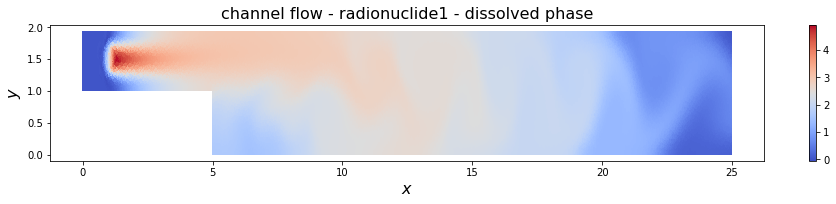

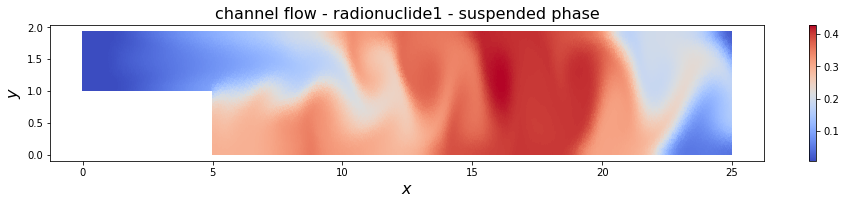

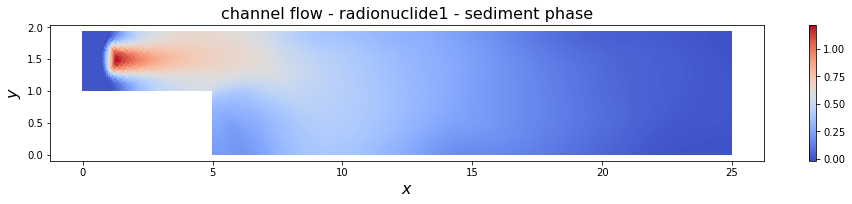

In [7]:
fig3 = plt.figure(figsize=(16, 2.5))
ax3 = fig3.add_subplot(111)
ax3.set_xlabel('$x$', fontsize=16)
ax3.set_ylabel('$y$', fontsize=16)
ax3.set_title('channel flow - radionuclide1 - dissolved phase', fontsize=16)
fd.plot(cd,axes=ax3)
# fig3.colorbar()
# ax3.axis('equal')

fig4 = plt.figure(figsize=(16, 2.5))
ax4 = fig4.add_subplot(111)
ax4.set_xlabel('$x$', fontsize=16)
ax4.set_ylabel('$y$', fontsize=16)
ax4.set_title('channel flow - radionuclide1 - suspended phase', fontsize=16)
fd.plot(cs, axes=ax4)
# ax4.axis('equal')

fig5 = plt.figure(figsize=(16, 2.5))
ax5 = fig5.add_subplot(111)
ax5.set_xlabel('$x$', fontsize=16)
ax5.set_ylabel('$y$', fontsize=16)
ax5.set_title('channel flow - radionuclide1 - sediment phase', fontsize=16)
fd.plot(csed, axes=ax5)
# ax5.axis('equal')